<a href="https://colab.research.google.com/github/satyamgipu/Iplt20analysis/blob/master/Copy_of_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [3]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path="/content/drive/My Drive/"
teams=pd.read_csv(path+"teams.csv")
match=pd.read_csv(path+"matches.csv")
Players=pd.read_excel(path+"Players.xlsx")
deliveries=pd.read_csv(path+"deliveries.csv")
teamwise_home_and_away=pd.read_csv(path+"teamwise_home_and_away.csv")
teams=pd.read_csv(path+"teams.csv")
most_runs_average_strikerate=pd.read_csv(path+"most_runs_average_strikerate.csv")



TOSS Vs winners

In [6]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


In [7]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [8]:
most_runs_average_strikerate.head(1)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351


In [9]:
teamwise_home_and_away.head(1)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.5,62.5


In [10]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
Players.head(1)

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India


In [12]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [13]:
match.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [14]:
match_id_with_no_result=list(match[match["result"]=="no result"].id)
match_id_with_no_result

[301, 546, 571, 11340]

In [15]:
match=match[~match["id"].isin(match_id_with_no_result)]
deliveries=deliveries[~deliveries["match_id"].isin(match_id_with_no_result)]

In [16]:
match[match["id"]==546]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [17]:
def inning_finder(winner,toss_decision,toss_winner):
  """ function return in which inning  a team wins the match""" 
  innings_winner=0
  if toss_winner==winner and toss_decision=="field":
    innings_winner=2
  elif toss_winner==winner and toss_decision=="bat":
    innings_winner=1
  elif toss_winner!=winner and toss_decision=="bat":
    innings_winner=2
  elif toss_winner!=winner and toss_decision=="field":
    innings_winner=1
  return innings_winner
match["innings_winner"]=match.apply(lambda x: inning_finder(x["winner"],x["toss_decision"],x["toss_winner"]),
                                                                                axis=1)

In [18]:
inning_wise_percentage=match[["team1","team2","innings_winner","winner"]].value_counts("innings_winner")/match.shape[0]
first_inning_percentage_win=inning_wise_percentage.iloc[0]
second_inning_percentage_win=inning_wise_percentage.iloc[1]


In [19]:
print(first_inning_percentage_win)
second_inning_percentage_win

0.5545212765957447


0.4454787234042553

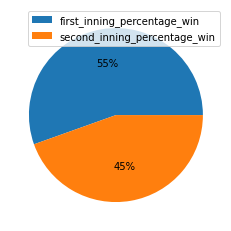

In [20]:
plt.pie([first_inning_percentage_win,second_inning_percentage_win],autopct='%1.0f%%')
plt.legend(["first_inning_percentage_win","second_inning_percentage_win"])

In [21]:
inning_wise_extra_runs=pd.DataFrame(deliveries.groupby(["match_id","inning"]).agg({"extra_runs":"sum"}))


In [22]:
inning_wise_extra_runs.shape

(1522, 1)

In [23]:
inning_wise_extra_runs=inning_wise_extra_runs.reset_index()

In [24]:
inning_wise_extra_runs.drop(inning_wise_extra_runs[inning_wise_extra_runs["inning"]>2].index,inplace=True )

In [25]:
inning_wise_extra_runs

,match_id,inning,extra_runs
0,1,1,7
1,1,2,6
2,2,1,8
3,2,2,4
4,3,1,4
...,...,...,...
1517,11413,2,5
1518,11414,1,8
1519,11414,2,11
1520,11415,1,3


In [26]:
def inning_wise_wins(x,temp=match):
 """ function return the wins or loose of the match based on the index and the inning with the help of match dataframe which is set as default """
 if int(match.loc[match["id"]==x["match_id"]]["innings_winner"])==x["inning"]:
     return "wins"
 else:
     return "Loose"
inning_wise_extra_runs["win_Loose"]=inning_wise_extra_runs.apply(lambda x: inning_wise_wins(x),axis=1)

In [27]:
inning_wise_extra_runs

,match_id,inning,extra_runs,win_Loose
0,1,1,7,wins
1,1,2,6,Loose
2,2,1,8,Loose
3,2,2,4,wins
4,3,1,4,Loose
...,...,...,...,...
1517,11413,2,5,wins
1518,11414,1,8,Loose
1519,11414,2,11,wins
1520,11415,1,3,wins


In [28]:
inning_wise_extra_runs.reset_index(inplace=True)

In [29]:
inning_wise_extra_runs.shape

(1504, 5)

In [30]:
MoreXtrarunswins=0
lessXtrarunsLoose=0
independentxtraruns=0

""" code to count wins when extra runs is greater or lesser or equal"""
for i in range(0,inning_wise_extra_runs.shape[0],2):
   if (inning_wise_extra_runs.iloc[i]["extra_runs"]>inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i]["win_Loose"]=="wins":
     MoreXtrarunswins+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]<inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i+1]["win_Loose"]=="wins":
     MoreXtrarunswins+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]>inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i]["win_Loose"]=="Loose":
     lessXtrarunsLoose+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]<inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i+1]["win_Loose"]=="Loose":
     lessXtrarunsLoose+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]==inning_wise_extra_runs.iloc[i+1]["extra_runs"]):
      independentxtraruns+=1
print(MoreXtrarunswins)
print(lessXtrarunsLoose)
print(independentxtraruns)
   


353
335
64


In [50]:
win_Count=(inning_wise_extra_runs.shape[0])//2
win_Count

752

In [51]:
XtrarunsWinsPercentage=(MoreXtrarunswins/win_Count)*100
XtrarunsWinsPercentage

46.941489361702125

In [52]:
XtrarunsLoosePercentage=(lessXtrarunsLoose/win_Count)*100
XtrarunsLoosePercentage

44.547872340425535

In [53]:
independentxtrarunspercentage=(independentxtraruns/win_Count)*100
independentxtrarunspercentage

8.51063829787234

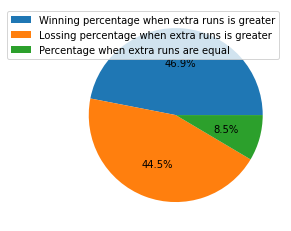

In [55]:
plt.pie([XtrarunsWinsPercentage,XtrarunsLoosePercentage,independentxtrarunspercentage],autopct='%1.01f%%')
plt.legend(["Winning percentage when extra runs is greater","Lossing percentage when extra runs is greater","Percentage when extra runs are equal"],loc=1)


In [214]:
total_runs_bowler=pd.DataFrame(deliveries.groupby(["match_id","bowler"]).agg({"total_runs":"sum"}))
total_runs_bowler

total_runs
match_id bowler                    
1        A Choudhary             55
         A Nehra                 42
         B Kumar                 28
         BCJ Cutting             35
         Bipul Sharma             4
...                             ...
11415    MJ McClenaghan          26
         RA Jadeja               12
         RD Chahar               14
         SL Malinga              50
         SN Thakur               37

[8948 rows x 1 columns]

In [215]:
total_runs_bowler.reset_index(inplace=True)

In [216]:
total_runs_bowler

,match_id,bowler,total_runs
0,1,A Choudhary,55
1,1,A Nehra,42
2,1,B Kumar,28
3,1,BCJ Cutting,35
4,1,Bipul Sharma,4
...,...,...,...
8943,11415,MJ McClenaghan,26
8944,11415,RA Jadeja,12
8945,11415,RD Chahar,14
8946,11415,SL Malinga,50


In [217]:
total_runs_bowler=pd.merge(total_runs_bowler, match.loc[:,["id","Season"]], left_on='match_id', right_on='id', how='inner')
total_runs_bowler

,match_id,bowler,total_runs,id,Season
0,1,A Choudhary,55,1,IPL-2017
1,1,A Nehra,42,1,IPL-2017
2,1,B Kumar,28,1,IPL-2017
3,1,BCJ Cutting,35,1,IPL-2017
4,1,Bipul Sharma,4,1,IPL-2017
...,...,...,...,...,...
8943,11415,MJ McClenaghan,26,11415,IPL-2019
8944,11415,RA Jadeja,12,11415,IPL-2019
8945,11415,RD Chahar,14,11415,IPL-2019
8946,11415,SL Malinga,50,11415,IPL-2019


In [218]:
total_runs_bowler.drop(["id"],axis=1,inplace=True)

In [219]:
total_runs_bowler

,match_id,bowler,total_runs,Season
0,1,A Choudhary,55,IPL-2017
1,1,A Nehra,42,IPL-2017
2,1,B Kumar,28,IPL-2017
3,1,BCJ Cutting,35,IPL-2017
4,1,Bipul Sharma,4,IPL-2017
...,...,...,...,...
8943,11415,MJ McClenaghan,26,IPL-2019
8944,11415,RA Jadeja,12,IPL-2019
8945,11415,RD Chahar,14,IPL-2019
8946,11415,SL Malinga,50,IPL-2019


In [220]:
Players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [222]:
total_runs_bowler=pd.merge(total_runs_bowler, Players.loc[:,["Player_Name","Bowling_Skill"]], left_on='bowler', right_on='Player_Name', how='inner')


In [232]:
unique_Bowling_list=list(Players.Bowling_Skill.unique())
unique_Bowling_list

['Right-arm medium',
 'Right-arm offbreak',
 'Left-arm fast-medium',
 'Right-arm fast-medium',
 nan,
 'Right-arm fast',
 'Legbreak googly',
 'Legbreak',
 'Left-arm medium-fast',
 'Slow left-arm orthodox',
 'Right-arm medium-fast',
 'Left-arm medium',
 'Left-arm fast',
 'Slow left-arm chinaman',
 'Right-arm bowler',
 'Right-arm Medium',
 'Right-arm Fast']

In [196]:
total_runs_bowler

,match_id,bowler,total_runs,Season,Player_Name,Bowling_Skill
0,1,A Choudhary,55,IPL-2017,A Choudhary,Left-arm fast-medium
1,30,A Choudhary,21,IPL-2017,A Choudhary,Left-arm fast-medium
2,37,A Choudhary,32,IPL-2017,A Choudhary,Left-arm fast-medium
3,42,A Choudhary,17,IPL-2017,A Choudhary,Left-arm fast-medium
4,45,A Choudhary,19,IPL-2017,A Choudhary,Left-arm fast-medium
...,...,...,...,...,...,...
8943,11344,O Thomas,13,IPL-2019,O Thomas,Right-arm fast
8944,11335,A Roy,14,IPL-2019,A Roy,Slow left-arm orthodox
8945,11338,S Warrier,31,IPL-2019,S Warrier,Right-arm fast-medium
8946,11343,S Warrier,31,IPL-2019,S Warrier,Right-arm fast-medium


In [223]:
def classify(x):
  if "fast" in x or "medium" in x:
    return "Pacer"
  else:
     return "Spinner"
total_runs_bowler["Broader_classification"]=total_runs_bowler["Bowling_Skill"].apply(lambda x: classify(x))

In [224]:
total_runs_bowler.drop("Bowling_Skill",inplace=True,axis=1)

In [225]:
total_runs_bowler

,match_id,bowler,total_runs,Season,Player_Name,Broader_classification
0,1,A Choudhary,55,IPL-2017,A Choudhary,Pacer
1,30,A Choudhary,21,IPL-2017,A Choudhary,Pacer
2,37,A Choudhary,32,IPL-2017,A Choudhary,Pacer
3,42,A Choudhary,17,IPL-2017,A Choudhary,Pacer
4,45,A Choudhary,19,IPL-2017,A Choudhary,Pacer
...,...,...,...,...,...,...
8943,11344,O Thomas,13,IPL-2019,O Thomas,Pacer
8944,11335,A Roy,14,IPL-2019,A Roy,Spinner
8945,11338,S Warrier,31,IPL-2019,S Warrier,Pacer
8946,11343,S Warrier,31,IPL-2019,S Warrier,Pacer


In [226]:
total_runs_bowler=total_runs_bowler.groupby(["Season","Broader_classification"]).agg({"total_runs":"sum"})

In [227]:
total_runs_bowler.reset_index(inplace=True)
total_runs_bowler

,Season,Broader_classification,total_runs
0,IPL-2008,Pacer,13662
1,IPL-2008,Spinner,4275
2,IPL-2009,Pacer,10223
3,IPL-2009,Spinner,6130
4,IPL-2010,Pacer,12119
5,IPL-2010,Spinner,6764
6,IPL-2011,Pacer,13466
7,IPL-2011,Spinner,7632
8,IPL-2012,Pacer,14570
9,IPL-2012,Spinner,7883


In [233]:
df = total_runs_bowler.pivot(index='Season', columns='Broader_classification', values='total_runs')
df.replace(np.NaN,0,inplace=True)
df

Broader_classification,Pacer,Spinner
Season,,
IPL-2008,13662,4275
IPL-2009,10223,6130
IPL-2010,12119,6764
IPL-2011,13466,7632
IPL-2012,14570,7883
IPL-2013,16490,6112
IPL-2014,11868,7063
IPL-2015,12058,5906
IPL-2016,12179,6683


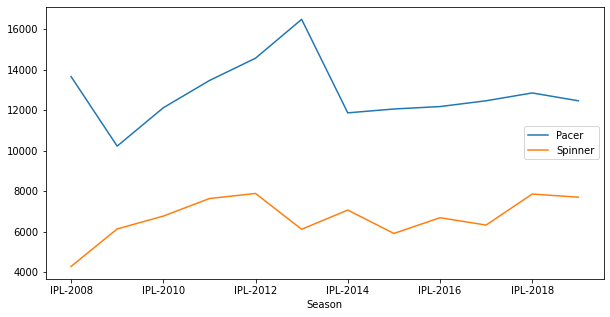

In [236]:

df.plot(figsize=(10,5))
plt.legend(loc='right')

In [181]:
Players.Batting_Hand.unique()

array(['Right_Hand', 'Right_hand', 'Left_Hand', nan], dtype=object)

In [182]:
df

Bowling_Skill,Left-arm fast,Left-arm fast-medium,Left-arm medium,Left-arm medium-fast,Legbreak,Legbreak googly,Right-arm Fast,Right-arm Medium,Right-arm fast,Right-arm fast-medium,Right-arm medium,Right-arm medium-fast,Right-arm offbreak,Slow left-arm chinaman,Slow left-arm orthodox
Season,,,,,,,,,,,,,,,
IPL-2008,NaN,1074.0,221.0,993.0,637.0,1003.0,NaN,NaN,905.0,3839.0,3287.0,3343.0,1726.0,NaN,909.0
IPL-2009,384.0,950.0,385.0,900.0,683.0,770.0,NaN,NaN,1237.0,2019.0,2487.0,1861.0,2685.0,NaN,1992.0
IPL-2010,235.0,1560.0,412.0,606.0,886.0,841.0,NaN,NaN,2020.0,2441.0,2471.0,2374.0,3082.0,NaN,1955.0
IPL-2011,31.0,1360.0,387.0,1130.0,751.0,338.0,NaN,NaN,2406.0,2007.0,2983.0,3162.0,3278.0,NaN,3265.0
IPL-2012,NaN,1030.0,289.0,1069.0,822.0,32.0,NaN,NaN,2766.0,2277.0,4080.0,3059.0,3315.0,262.0,3452.0
IPL-2013,636.0,819.0,447.0,851.0,972.0,286.0,NaN,NaN,1691.0,3774.0,4759.0,3513.0,2700.0,31.0,2123.0
IPL-2014,869.0,732.0,404.0,775.0,1286.0,1150.0,NaN,NaN,1791.0,1627.0,3565.0,2105.0,2258.0,NaN,2369.0
IPL-2015,617.0,1312.0,163.0,618.0,897.0,1202.0,NaN,NaN,1812.0,1727.0,3977.0,1832.0,1751.0,148.0,1908.0
IPL-2016,108.0,1538.0,518.0,483.0,966.0,1238.0,NaN,NaN,1010.0,2828.0,3520.0,2174.0,1760.0,592.0,2127.0


In [237]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [296]:
total_runs_batsman=pd.DataFrame(deliveries.groupby(["match_id","batsman"]).agg({"batsman_runs":"sum"}))
total_runs_batsman

batsman_runs
match_id batsman                  
1        A Choudhary             6
         BCJ Cutting            16
         CH Gayle               32
         DA Warner              14
         DJ Hooda               16
...                            ...
11415    RD Chahar               0
         RG Sharma              15
         SK Raina                9
         SN Thakur               2
         SR Watson              84

[11262 rows x 1 columns]

In [297]:
total_runs_batsman.reset_index(inplace=True)
total_runs_batsman

,match_id,batsman,batsman_runs
0,1,A Choudhary,6
1,1,BCJ Cutting,16
2,1,CH Gayle,32
3,1,DA Warner,14
4,1,DJ Hooda,16
...,...,...,...
11257,11415,RD Chahar,0
11258,11415,RG Sharma,15
11259,11415,SK Raina,9
11260,11415,SN Thakur,2


In [298]:
total_runs_batsman=pd.merge(total_runs_batsman, match.loc[:,["id","Season"]], left_on='match_id', right_on='id', how='inner')
total_runs_batsman

,match_id,batsman,batsman_runs,id,Season
0,1,A Choudhary,6,1,IPL-2017
1,1,BCJ Cutting,16,1,IPL-2017
2,1,CH Gayle,32,1,IPL-2017
3,1,DA Warner,14,1,IPL-2017
4,1,DJ Hooda,16,1,IPL-2017
...,...,...,...,...,...
11257,11415,RD Chahar,0,11415,IPL-2019
11258,11415,RG Sharma,15,11415,IPL-2019
11259,11415,SK Raina,9,11415,IPL-2019
11260,11415,SN Thakur,2,11415,IPL-2019


In [299]:
total_runs_batsman=pd.merge(total_runs_batsman, Players.loc[:,["Player_Name","Batting_Hand"]], left_on='batsman', right_on='Player_Name', how='inner')
total_runs_batsman

,match_id,batsman,batsman_runs,id,Season,Player_Name,Batting_Hand
0,1,A Choudhary,6,1,IPL-2017,A Choudhary,Right_hand
1,30,A Choudhary,15,30,IPL-2017,A Choudhary,Right_hand
2,42,A Choudhary,4,42,IPL-2017,A Choudhary,Right_hand
3,1,BCJ Cutting,16,1,IPL-2017,BCJ Cutting,Right_Hand
4,10,BCJ Cutting,20,10,IPL-2017,BCJ Cutting,Right_Hand
...,...,...,...,...,...,...,...
11257,11344,S Rutherford,12,11344,IPL-2019,S Rutherford,Left_Hand
11258,11413,S Rutherford,9,11413,IPL-2019,S Rutherford,Left_Hand
11259,11414,S Rutherford,14,11414,IPL-2019,S Rutherford,Left_Hand
11260,11329,P Raj,0,11329,IPL-2019,P Raj,Right_Hand


In [300]:
print(total_runs_batsman.Batting_Hand.unique())
total_runs_batsman.loc[total_runs_batsman["Batting_Hand"]=="Right_hand","Batting_Hand"]="Right_Hand"
total_runs_batsman

,match_id,batsman,batsman_runs,id,Season,Player_Name,Batting_Hand
0,1,A Choudhary,6,1,IPL-2017,A Choudhary,Right_Hand
1,30,A Choudhary,15,30,IPL-2017,A Choudhary,Right_Hand
2,42,A Choudhary,4,42,IPL-2017,A Choudhary,Right_Hand
3,1,BCJ Cutting,16,1,IPL-2017,BCJ Cutting,Right_Hand
4,10,BCJ Cutting,20,10,IPL-2017,BCJ Cutting,Right_Hand
...,...,...,...,...,...,...,...
11257,11344,S Rutherford,12,11344,IPL-2019,S Rutherford,Left_Hand
11258,11413,S Rutherford,9,11413,IPL-2019,S Rutherford,Left_Hand
11259,11414,S Rutherford,14,11414,IPL-2019,S Rutherford,Left_Hand
11260,11329,P Raj,0,11329,IPL-2019,P Raj,Right_Hand


In [301]:
total_runs_batsman=total_runs_batsman.groupby(["Season","Batting_Hand"]).agg({"batsman_runs":"sum"})

In [302]:
total_runs_batsman

batsman_runs
Season   Batting_Hand              
IPL-2008 Left_Hand             6980
         Right_Hand            9829
IPL-2009 Left_Hand             5636
         Right_Hand            9740
IPL-2010 Left_Hand             5669
         Right_Hand           12085
IPL-2011 Left_Hand             6962
         Right_Hand           12915
IPL-2012 Left_Hand             6388
         Right_Hand           14934
IPL-2013 Left_Hand             6697
         Right_Hand           14790
IPL-2014 Left_Hand             5140
         Right_Hand           12803
IPL-2015 Left_Hand             4903
         Right_Hand           12157
IPL-2016 Left_Hand             5905
         Right_Hand           12058
IPL-2017 Left_Hand             6259
         Right_Hand           11661
IPL-2018 Left_Hand             5646
         Right_Hand           14260
IPL-2019 Left_Hand             6418
         Right_Hand           12930

In [303]:
total_runs_batsman.reset_index(inplace=True)
total_runs_batsman

,Season,Batting_Hand,batsman_runs
0,IPL-2008,Left_Hand,6980
1,IPL-2008,Right_Hand,9829
2,IPL-2009,Left_Hand,5636
3,IPL-2009,Right_Hand,9740
4,IPL-2010,Left_Hand,5669
5,IPL-2010,Right_Hand,12085
6,IPL-2011,Left_Hand,6962
7,IPL-2011,Right_Hand,12915
8,IPL-2012,Left_Hand,6388
9,IPL-2012,Right_Hand,14934


In [304]:
df = total_runs_batsman.pivot(index='Season', columns='Batting_Hand', values='batsman_runs')
df.replace(np.NaN,0,inplace=True)
df

Batting_Hand,Left_Hand,Right_Hand
Season,,
IPL-2008,6980,9829
IPL-2009,5636,9740
IPL-2010,5669,12085
IPL-2011,6962,12915
IPL-2012,6388,14934
IPL-2013,6697,14790
IPL-2014,5140,12803
IPL-2015,4903,12157
IPL-2016,5905,12058


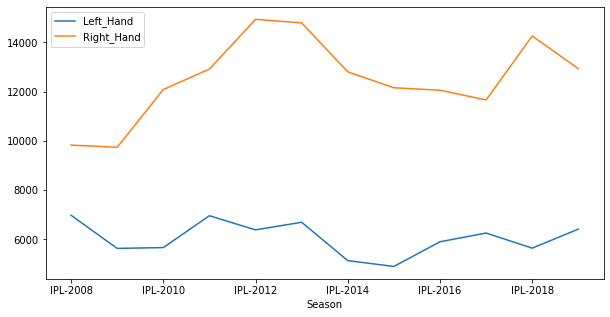

In [307]:

df.plot(figsize=(10,5))
plt.legend()

In [321]:
deliveries[deliveries["match_id"]==1].groupby(["match_id","bowler"]).agg({"dismissal_kind":"count"})

dismissal_kind
match_id bowler                      
1        A Choudhary                1
         A Nehra                    2
         B Kumar                    2
         BCJ Cutting                1
         Bipul Sharma               1
         DJ Hooda                   1
         MC Henriques               1
         Rashid Khan                2
         S Aravind                  0
         SR Watson                  0
         STR Binny                  1
         TM Head                    0
         TS Mills                   1
         YS Chahal                  1

In [325]:
deliveries.groupby("match_id").agg({"player_dismissed":"count"})

,player_dismissed
match_id,
1,14
2,11
3,4
4,10
5,17
...,...
11347,8
11412,8
11413,14
